<a href="https://colab.research.google.com/github/Rishabh5752/MHD-DAIC-/blob/main/DAIC_ML_DL_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Load the dataset (replace 'merged_data.csv' with your actual dataset file)
data = pd.read_csv('merged_data.csv')

# Separate features and target
X = data.drop(['Participant_ID', 'PHQ_8Total'], axis=1).values
y = data['PHQ_8Total'].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize lists to store MSE and R-squared scores
mse_scores = []
r2_scores = []

# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest MSE: {rf_mse:.4f}, R-squared: {rf_r2:.4f}")
mse_scores.append(rf_mse)
r2_scores.append(rf_r2)

# XGBoost Regressor
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
print(f"XGBoost MSE: {xgb_mse:.4f}, R-squared: {xgb_r2:.4f}")
mse_scores.append(xgb_mse)
r2_scores.append(xgb_r2)

# Support Vector Machines (SVM)
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_r2 = r2_score(y_test, svm_predictions)
print(f"SVM MSE: {svm_mse:.4f}, R-squared: {svm_r2:.4f}")
mse_scores.append(svm_mse)
r2_scores.append(svm_r2)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)
print(f"KNN MSE: {knn_mse:.4f}, R-squared: {knn_r2:.4f}")
mse_scores.append(knn_mse)
r2_scores.append(knn_r2)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print(f"Linear Regression MSE: {lr_mse:.4f}, R-squared: {lr_r2:.4f}")
mse_scores.append(lr_mse)
r2_scores.append(lr_r2)

# AdaBoost Regressor
adaboost_model = AdaBoostRegressor(random_state=42)
adaboost_model.fit(X_train, y_train)
adaboost_predictions = adaboost_model.predict(X_test)
adaboost_mse = mean_squared_error(y_test, adaboost_predictions)
adaboost_r2 = r2_score(y_test, adaboost_predictions)
print(f"AdaBoost MSE: {adaboost_mse:.4f}, R-squared: {adaboost_r2:.4f}")
mse_scores.append(adaboost_mse)
r2_scores.append(adaboost_r2)

# Compare MSE and R-squared scores
best_model_index_mse = mse_scores.index(min(mse_scores))
best_model_index_r2 = r2_scores.index(max(r2_scores))

print("\nBest model based on MSE:", ["Random Forest", "XGBoost", "SVM", "KNN", "Linear Regression", "AdaBoost"][best_model_index_mse])
print("Best model based on R-squared:", ["Random Forest", "XGBoost", "SVM", "KNN", "Linear Regression", "AdaBoost"][best_model_index_r2])

Random Forest MSE: 51.9589, R-squared: -0.2579
XGBoost MSE: 98.0127, R-squared: -1.3729
SVM MSE: 42.3353, R-squared: -0.0249
KNN MSE: 60.1100, R-squared: -0.4553
Linear Regression MSE: 83.5283, R-squared: -1.0222
AdaBoost MSE: 54.1057, R-squared: -0.3099

Best model based on MSE: SVM
Best model based on R-squared: SVM


In [ ]:
#Grid Search CV
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset (replace 'merged_data.csv' with your actual dataset file)
data = pd.read_csv('merged_data.csv')

# Separate features and target
X = data.drop(['Participant_ID', 'PHQ_8Total'], axis=1).values
y = data['PHQ_8Total'].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Define hyperparameters grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the best estimator on test data
best_predictions = best_estimator.predict(X_test)
best_mse = mean_squared_error(y_test, best_predictions)
best_r2 = r2_score(y_test, best_predictions)

print(f"Best Parameters: {best_params}")
print(f"Best MSE: {best_mse:.4f}")
print(f"Best R-squared: {best_r2:.4f}")


Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Best MSE: 46.1390
Best R-squared: -0.1170


In [ ]:
data.describe()

,Participant_ID,PHQ_8Total,0,1,2,3,4,5,6,7,...,980,981,982,983,984,985,986,987,988,989
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.000000,56.000000,56.000000,56.0,...,56.00000,56.00000,56.00000,56.0,56.000000,56.000000,56.000000,56.0,56.000000,56.000000
mean,464.071429,4.714286,0.821429,0.821429,0.821429,255.0,1.000000,1.000000,1.000000,255.0,...,0.50000,0.50000,0.50000,255.0,0.785714,0.785714,0.785714,255.0,1.178571,1.178571
std,16.739564,5.466308,6.147009,6.147009,6.147009,0.0,4.752033,4.752033,4.752033,0.0,...,3.03315,3.03315,3.03315,0.0,5.362205,5.362205,5.362205,0.0,7.231515,7.231515
min,436.000000,0.000000,0.000000,0.000000,0.000000,255.0,0.000000,0.000000,0.000000,255.0,...,0.00000,0.00000,0.00000,255.0,0.000000,0.000000,0.000000,255.0,0.000000,0.000000
25%,449.750000,1.000000,0.000000,0.000000,0.000000,255.0,0.000000,0.000000,0.000000,255.0,...,0.00000,0.00000,0.00000,255.0,0.000000,0.000000,0.000000,255.0,0.000000,0.000000
50%,464.500000,3.000000,0.000000,0.000000,0.000000,255.0,0.000000,0.000000,0.000000,255.0,...,0.00000,0.00000,0.00000,255.0,0.000000,0.000000,0.000000,255.0,0.000000,0.000000
75%,478.250000,7.000000,0.000000,0.000000,0.000000,255.0,0.000000,0.000000,0.000000,255.0,...,0.00000,0.00000,0.00000,255.0,0.000000,0.000000,0.000000,255.0,0.000000,0.000000
max,492.000000,19.000000,46.000000,46.000000,46.000000,255.0,30.000000,30.000000,30.000000,255.0,...,22.00000,22.00000,22.00000,255.0,40.000000,40.000000,40.000000,255.0,53.000000,53.000000


In [ ]:
data.head()

,Participant_ID,PHQ_8Total,0,1,2,3,4,5,6,7,...,980,981,982,983,984,985,986,987,988,989
0,436,0,0,0,0,255,0,0,0,255,...,0,0,0,255,0,0,0,255,0,0
1,437,0,0,0,0,255,0,0,0,255,...,0,0,0,255,0,0,0,255,0,0
2,438,2,0,0,0,255,0,0,0,255,...,0,0,0,255,4,4,4,255,0,0
3,439,1,0,0,0,255,0,0,0,255,...,0,0,0,255,0,0,0,255,0,0
4,440,19,0,0,0,255,0,0,0,255,...,0,0,0,255,0,0,0,255,0,0


   Participant_ID  PHQ_8Total  0  1  2    3  4  5  6    7  ...  980  981  982  \
0             436           0  0  0  0  255  0  0  0  255  ...    0    0    0   
1             437           0  0  0  0  255  0  0  0  255  ...    0    0    0   
2             438           2  0  0  0  255  0  0  0  255  ...    0    0    0   
3             439           1  0  0  0  255  0  0  0  255  ...    0    0    0   
4             440          19  0  0  0  255  0  0  0  255  ...    0    0    0   

   983  984  985  986  987  988  989  
0  255    0    0    0  255    0    0  
1  255    0    0    0  255    0    0  
2  255    4    4    4  255    0    0  
3  255    0    0    0  255    0    0  
4  255    0    0    0  255    0    0  

[5 rows x 992 columns]
       Participant_ID  PHQ_8Total          0          1          2      3  \
count       56.000000   56.000000  56.000000  56.000000  56.000000   56.0   
mean       464.071429    4.714286   0.821429   0.821429   0.821429  255.0   
std         16.739564   

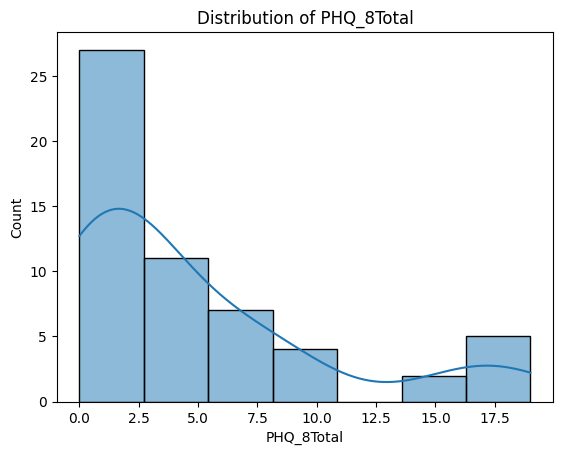

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (Replace 'merged_data.csv' with your dataset file)
data = pd.read_csv('merged_data.csv')

# Explore data
print(data.head())  # Display the first few rows
print(data.describe())  # Summary statistics

# Visualize the distribution of 'PHQ_8Total'
sns.histplot(data['PHQ_8Total'], kde=True)
plt.xlabel('PHQ_8Total')
plt.title('Distribution of PHQ_8Total')
plt.show()

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import pandas as pd
import numpy as np
import os
import re  # Import regular expression module
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Load the merged_data.csv with PHQ_8Total scores
data = pd.read_csv('/content/merged_data.csv')

# Root path to the folders containing participant-wise image folders
root_folder_path = '/content/drive/MyDrive/daic_dataset_folder'

# Lists to store image paths and corresponding PHQ_8Total scores
image_paths = []
phq_scores = []

# Traverse through participant folders
for participant_folder in os.listdir(root_folder_path):
    participant_folder_path = os.path.join(root_folder_path, participant_folder)
    if os.path.isdir(participant_folder_path):
        # Extract participant ID from folder name using regular expression
        match = re.search(r'\d+', participant_folder)
        if match:
            participant_id = match.group()
            for filename in os.listdir(participant_folder_path):
                if filename.endswith('.png'):  # Assuming images are in png format
                    image_paths.append(os.path.join(participant_folder_path, filename))
                    # Extract PHQ_8Total score from data based on Participant_ID or any relevant mapping
                    phq_score = data[data['Participant_ID'] == int(participant_id)]['PHQ_8Total'].values
                    if len(phq_score) > 0:
                        phq_scores.append(phq_score[0])

# Load images and convert to arrays
images = []
for img_path in image_paths:
    img = load_img(img_path, target_size=(4, 4))  # Set image height and width
    img_array = img_to_array(img)
    images.append(img_array)

# Convert lists to numpy arrays
images = np.array(images)
phq_scores = np.array(phq_scores)

# Check if images and phq_scores are not empty
print(f"Number of loaded images: {len(images)}")
print(f"Number of PHQ_8Total scores: {len(phq_scores)}")

# If there are images and scores, continue
if len(images) > 0 and len(phq_scores) > 0:
    # Split the dataset into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(images, phq_scores, test_size=0.2, random_state=42)

    # Build the CNN model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(4, 4, 3)))
    model.add(MaxPooling2D((2, 2)))
    # Add more layers as needed
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))  # Output layer for regression

    # Compile the model
    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

    # Train the model
    model.fit(X_train, y_train, epochs=1000, batch_size=10, validation_data=(X_val, y_val))

Number of loaded images: 56
Number of PHQ_8Total scores: 56


In [25]:

# If there are images and scores, continue
if len(images) > 0 and len(phq_scores) > 0:
    # Split the dataset into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(images, phq_scores, test_size=0.2, random_state=42)

    # Build the CNN model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(4, 4, 3)))
    model.add(MaxPooling2D((2, 2)))
    # Add more layers as needed
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))  # Output layer for regression

    # Compile the model
    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

    # Train the model
    model.fit(X_train, y_train, epochs=1000, batch_size=10, validation_data=(X_val, y_val))

Epoch 1/1000
5/5 [==============================] - 1s 45ms/step - loss: 133.9279 - mae: 9.2685 - val_loss: 147.4365 - val_mae: 9.9248
Epoch 2/1000
5/5 [==============================] - 0s 14ms/step - loss: 102.1510 - mae: 7.8333 - val_loss: 96.7039 - val_mae: 8.0613
Epoch 3/1000
5/5 [==============================] - 0s 14ms/step - loss: 49.2302 - mae: 5.2523 - val_loss: 81.0736 - val_mae: 6.9558
Epoch 4/1000
5/5 [==============================] - 0s 10ms/step - loss: 42.7307 - mae: 4.9700 - val_loss: 67.6461 - val_mae: 6.3254
Epoch 5/1000
5/5 [==============================] - 0s 11ms/step - loss: 29.6789 - mae: 4.0075 - val_loss: 67.2196 - val_mae: 6.5306
Epoch 6/1000
5/5 [==============================] - 0s 10ms/step - loss: 28.9550 - mae: 4.0065 - val_loss: 66.0861 - val_mae: 6.4279
Epoch 7/1000
5/5 [==============================] - 0s 14ms/step - loss: 23.5769 - mae: 3.5395 - val_loss: 60.1805 - val_mae: 5.8559
Epoch 8/1000
5/5 [==============================] - 0s 12ms/step -